In [1]:
import missingno
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="white")
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_validate,cross_val_predict

df = pd.read_csv('xapi-Edu-data.csv')

# Data Cleaning

In [2]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.shape

(480, 17)

In [4]:
#It does make sense that a student won't visit resources, raise hands in class and view announcements
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<AxesSubplot:>

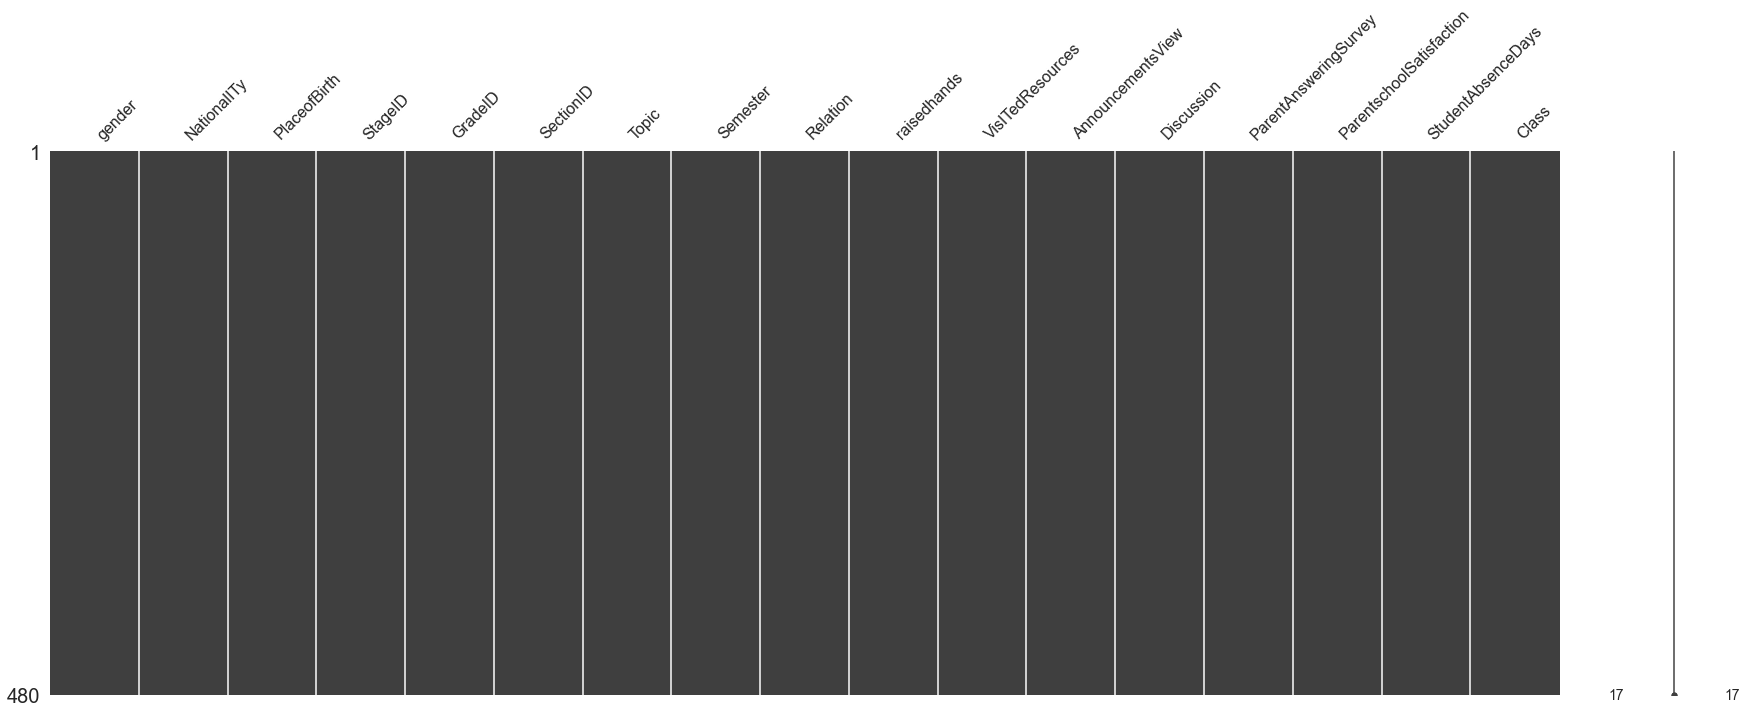

In [6]:
#Looking for Missing Values
#No missing values
missingno.matrix(df,figsize=(30,10))

In [7]:
df[df.duplicated(df.columns)]
#No duplicates

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L


In [8]:
df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

# Encoding Categorical Features

## One Hot Encoding

In [9]:
features1 = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                    'SectionID', 'Topic', 'Semester', 'Relation','ParentAnsweringSurvey',
                    'ParentschoolSatisfaction','StudentAbsenceDays','Class']
encoded_features = []
def encode_it_all(df):
    # one-hot encoding
    all_encodings = []
    encoded_features = []
    for feature in features1:
        # print(feature)
        X = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        cols = [feature + '_' + str(i) for i in range(0, df[feature].nunique())]
        encoded_features += cols
        tmp_df = pd.DataFrame(X, columns=cols)
        tmp_df.index = df.index
        all_encodings.append(tmp_df)
        
 
    # then let's create a new df with all of these new variables
    return(pd.concat([df, *all_encodings], axis=1))

one_hot_encoded_df = encode_it_all(df)


In [10]:
one_hot_encoded_df.drop(features1,axis=1,inplace=True)

In [11]:
one_hot_encoded_df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_0,gender_1,NationalITy_0,NationalITy_1,NationalITy_2,NationalITy_3,...,Relation_1,ParentAnsweringSurvey_0,ParentAnsweringSurvey_1,ParentschoolSatisfaction_0,ParentschoolSatisfaction_1,StudentAbsenceDays_0,StudentAbsenceDays_1,Class_0,Class_1,Class_2
0,15,16,2,20,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,20,20,3,25,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,10,7,0,30,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,30,25,5,35,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,40,50,12,50,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Base Model

In [12]:
X = StandardScaler().fit_transform(one_hot_encoded_df[one_hot_encoded_df.columns[:-3]])
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Logistic Regression

In [13]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
Logistic_Regression_Scores = cross_validate(LogisticRegression(), X_train, y_train,scoring='accuracy', cv=10)
print("10 fold cross validation results")
print("Accuracy: %0.2f (+/- %0.2f)" % (Logistic_Regression_Scores["test_score"].mean(),Logistic_Regression_Scores["test_score"].std()))


10 fold cross validation results
Accuracy: 0.72 (+/- 0.05)


## Support Vector Machine

In [14]:
Support_Vector_Machine = svm.SVC(kernel='rbf',gamma='scale',C=10,class_weight='balanced')
Support_Vector_Machine.fit(X_train, y_train)
SVM_Scores = cross_validate(Support_Vector_Machine, X_train, y_train,scoring='accuracy',cv=10)
print("10 fold cross validation results")
print("Accuracy: %0.2f (+/- %0.2f)" % (SVM_Scores["test_score"].mean(),SVM_Scores["test_score"].std()))

10 fold cross validation results
Accuracy: 0.72 (+/- 0.08)


## K-Nearest Neighbour

In [15]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='manhattan')
KNN.fit(X_train, y_train)
KNN_Scores = cross_validate(KNN, X_train, y_train, scoring='accuracy', cv=10,return_train_score=True)
print("10 fold cross validation results")
print("Accuracy: %0.2f (+/- %0.2f)" % (KNN_Scores["test_score"].mean(),KNN_Scores["test_score"].std()))

10 fold cross validation results
Accuracy: 0.66 (+/- 0.06)


## Gaussian Naive Bayes

In [16]:
Gaussian_NB = GaussianNB()
Gaussian_NB.fit(X_train, y_train)
Gaussian_Scores = cross_validate(Gaussian_NB,X_train, y_train,scoring='accuracy', cv=10)
print("10 fold cross validation results")
print("Accuracy: %0.2f (+/- %0.2f)" % (Gaussian_Scores["test_score"].mean(),Gaussian_Scores["test_score"].std()))

10 fold cross validation results
Accuracy: 0.37 (+/- 0.04)


## Random Forest

In [17]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)
Random_Forest_Scores = cross_validate(RandomForestClassifier(), X_train, y_train, cv=10)
print("10 fold cross validation results")
print("Accuracy: %0.2f (+/- %0.2f)" % (Random_Forest_Scores["test_score"].mean(),Random_Forest_Scores["test_score"].std()))

10 fold cross validation results
Accuracy: 0.79 (+/- 0.05)


## Multi-Layer Perception

In [18]:
Multi_Layer = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
Multi_Layer.fit(X_train, y_train)
Multi_Layer_Scores = cross_validate(Multi_Layer, X_train, y_train, cv=10)
print("10 fold cross validation results")
print("Accuracy: %0.2f (+/- %0.2f)" % (Multi_Layer_Scores["test_score"].mean(),Multi_Layer_Scores["test_score"].std()))


10 fold cross validation results
Accuracy: 0.65 (+/- 0.09)


In [19]:
X_test = pd.DataFrame(X_test)
X_test.columns = one_hot_encoded_df.columns[:-3]

# Feature Selection

To improve on our models accuracy, we will use feature selection. We now continuosly add features with accordance to their mutual information gain until model perfomance starts to flatten out in order to get a cut off point.

In [20]:
features=np.array([feature for feature in X_test.columns])
information_gain=mutual_info_classif(X_test, y_test,n_neighbors=3)
idx=np.argsort(information_gain)[::-1]
information_gain=information_gain[idx]
features=features[idx]

Number of features kept: 29
Number of features: removed 43
Accuracy: 0.78 (+/- 0.13)


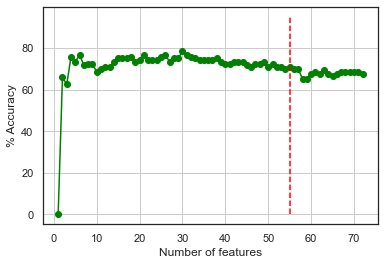

In [21]:
number_of_features=np.arange(1,len(features)+1)
accuracy=np.zeros(len(features))
std=np.zeros(len(features))

for i in range(1,len(features)):
    x_norm_pruned=X_test[(features[:i])]
    support_vector_machine = svm.SVC(kernel="rbf",C=6)
    support_vector_machine.fit(x_norm_pruned, y_test)
    scores = cross_validate(support_vector_machine, x_norm_pruned, y_test, scoring="accuracy",cv=10)
    accuracy[i]=scores["test_score"].mean()
    std[i]=scores["test_score"].std()
    
index=np.argsort(accuracy)
print("Number of features kept:",index[-1])
print("Number of features: removed",len(idx)-index[-1])
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy[index[-1]],std[-1]))
plt.figure()
plt.grid(True)
# plt.rc('xtick',labelsize=8)
# plt.rc('ytick',labelsize=8)
plt.xlabel("Number of features")
plt.ylabel("% Accuracy")

plt.scatter(number_of_features,accuracy*100,c="green")
plt.plot(number_of_features,accuracy*100,c="green")
plt.vlines(x=55,ymin=0,ymax=95,linestyles="dashed",color="red")
plt.savefig("accuracy_graph.png")
plt.show()

## Best Features

In [22]:
idx=np.argsort(accuracy)[::-1]
optimal_features=(features[0:idx[0]])
for i in range(len(optimal_features)):
    print(optimal_features[i],",","mutual information :",information_gain[i])

VisITedResources , mutual information : 0.3610190362972263
raisedhands , mutual information : 0.34048717252094685
StudentAbsenceDays_1 , mutual information : 0.30332168648730184
StudentAbsenceDays_0 , mutual information : 0.27787228635040173
AnnouncementsView , mutual information : 0.20445876460344659
ParentAnsweringSurvey_1 , mutual information : 0.16585318712405783
PlaceofBirth_9 , mutual information : 0.12094389806916306
ParentAnsweringSurvey_0 , mutual information : 0.11559229216112277
Topic_0 , mutual information : 0.11333203414470261
Topic_2 , mutual information : 0.11136222373352234
ParentschoolSatisfaction_1 , mutual information : 0.11093473857777636
Topic_8 , mutual information : 0.1045017782847153
Discussion , mutual information : 0.0990872506220204
Relation_1 , mutual information : 0.0955888392757891
gender_1 , mutual information : 0.09401125721582759
PlaceofBirth_5 , mutual information : 0.09351520294687088
PlaceofBirth_1 , mutual information : 0.07856879797570016
NationalI

In [23]:
df['SectionID'].unique()

array(['A', 'B', 'C'], dtype=object)

In [24]:
df['PlaceofBirth'].unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

In [25]:
df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [26]:
df['Topic'].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [27]:
df['ParentAnsweringSurvey'].unique()

array(['Yes', 'No'], dtype=object)

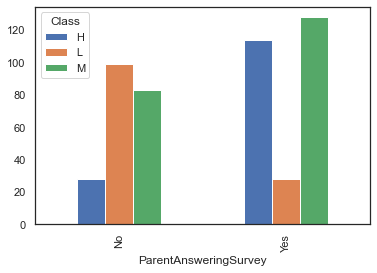

In [28]:
df_gb = df.groupby(['ParentAnsweringSurvey','Class']).size().unstack(level=1)
df_gb.plot(kind='bar')
plt.savefig("ParentAnsweringSurvey.png")

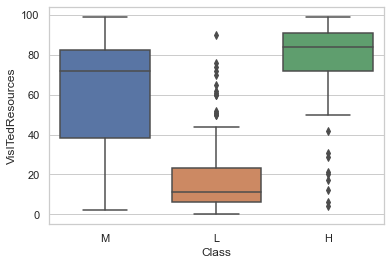

In [29]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Class", y="VisITedResources", data=df)
plt.savefig("Visited_Resources.png")

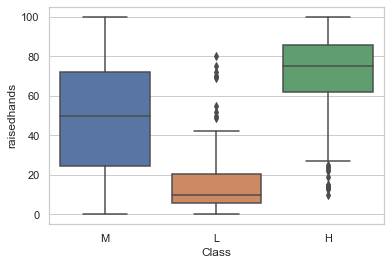

In [30]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Class", y="raisedhands", data=df)
plt.savefig("Visited_Resources.png")

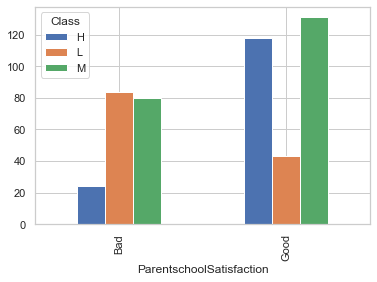

In [31]:
df_ps = df.groupby(['ParentschoolSatisfaction','Class']).size().unstack(level=1)
df_ps.plot(kind='bar')
plt.savefig("ParentSatisfactonSurvey.png")

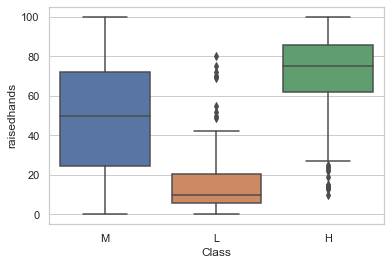

In [32]:
rh = sns.boxplot(x="Class", y="raisedhands", data=df)
plt.savefig("RaisedHands.png")

# Modelling and Accuracy Analysis

In [33]:
Xnew = StandardScaler().fit_transform(one_hot_encoded_df[optimal_features])
ynew = df.Class
X_Train, X_Test, y_Train, y_Test = train_test_split(Xnew, ynew, test_size=0.25, random_state=42)

In [34]:
def Confusion_Matrix(model,name):
    model.fit(X_Test, y_Test)
    predictions = cross_val_predict(model,X_Test,y_Test,cv=10)
    cm = confusion_matrix(y_Test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.savefig(name+".png",cmap="gray")
    plt.show()

In [35]:
def numeric_metrics(model):
    scores = cross_validate(model, X_Test, y_Test, scoring=["accuracy","precision_macro","recall_macro"],cv=10)
    accuracy_mean,accuracy_std=(scores["test_accuracy"].mean()*100,100*scores["test_accuracy"].std())
    recall_mean,recall_std=(scores["test_recall_macro"].mean()*100,100*scores["test_recall_macro"].std())
    precision_mean,precision_std=(scores["test_precision_macro"].mean()*100,100*scores["test_precision_macro"].std())
    print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_mean,accuracy_std))
    print("Recall: %0.2f (+/- %0.2f)" % (recall_mean,recall_std))
    print("Precision: %0.2f (+/- %0.2f)" % (precision_mean,precision_std))
    print("Fitting time :",scores["fit_time"].mean())

## Random Forest

Accuracy: 75.83 (+/- 7.86)
Recall: 74.89 (+/- 9.05)
Precision: 78.65 (+/- 11.40)
Fitting time : 0.12913107872009277


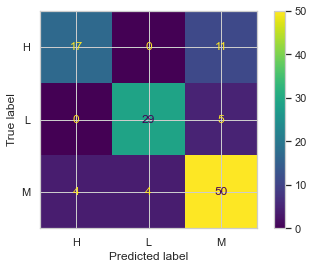

In [36]:
numeric_metrics(Random_Forest)
Confusion_Matrix(Random_Forest,"RandomForest")

## K-Nearest Neighbour

Accuracy: 77.50 (+/- 10.57)
Recall: 77.44 (+/- 11.04)
Precision: 80.22 (+/- 10.75)
Fitting time : 0.0012939453125


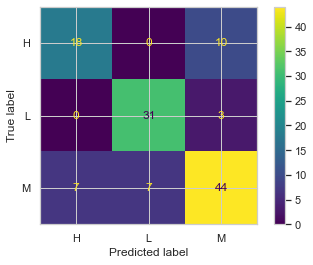

In [37]:
numeric_metrics(KNN)
Confusion_Matrix(KNN,"KNN")

## Support Vector Machine

Accuracy: 75.00 (+/- 6.45)
Recall: 75.39 (+/- 7.92)
Precision: 76.19 (+/- 7.99)
Fitting time : 0.003538703918457031


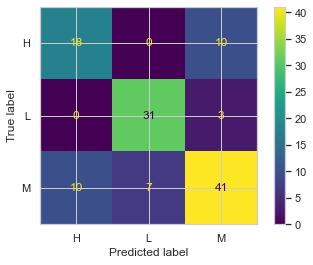

In [38]:
numeric_metrics(Support_Vector_Machine)
Confusion_Matrix(Support_Vector_Machine,"SVM")

## Logistic Regreession

Accuracy: 73.33 (+/- 14.81)
Recall: 73.89 (+/- 14.99)
Precision: 75.50 (+/- 15.45)
Fitting time : 0.017871832847595213


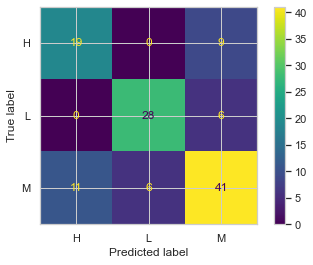

In [39]:
numeric_metrics(Logistic_Regression)
Confusion_Matrix(Logistic_Regression,"LR")

## Gaussian Naive Bayes

Accuracy: 62.50 (+/- 17.97)
Recall: 63.50 (+/- 18.50)
Precision: 62.92 (+/- 20.50)
Fitting time : 0.0023764610290527345


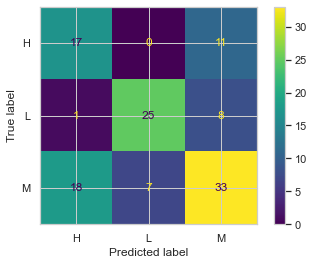

In [40]:
numeric_metrics(Gaussian_NB)
Confusion_Matrix(Gaussian_NB,"GaussianNB")

## Multi-Layer Perception

Accuracy: 71.67 (+/- 14.04)
Recall: 71.94 (+/- 14.58)
Precision: 75.66 (+/- 13.62)
Fitting time : 0.11938464641571045


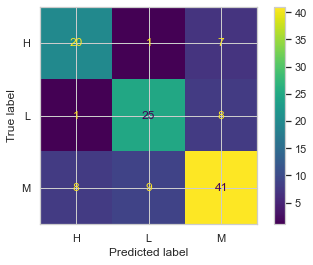

In [41]:
numeric_metrics(Multi_Layer)
Confusion_Matrix(Multi_Layer,"MLP")